# Neuromorphic Computing Assignment 2

## 0. Example Code

### Download the program and move it up one directory.


In [1]:
# Delete everything in the content (current) directory on google colab
!rm -rf /content/* || echo rm -rf /content/* failed

# Clone git repo, change the branch and move it up by one level in the folder hierarchy
!git clone https://gitlab.socsci.ru.nl/snnsimulator/simsnn.git
!cd simsnn && git checkout cloud_integration
!mv ./simsnn ./simsnnn
!mv ./simsnnn/* ./
!rm -rf simsnnn || echo rm -rf simsnnn failed

Cloning into 'simsnn'...
remote: Enumerating objects: 2235, done.
remote: Counting objects: 100% (2235/2235), done.
remote: Compressing objects: 100% (796/796), done.
remote: Total 2235 (delta 1432), reused 2190 (delta 1412), pack-reused 0
Receiving objects: 100% (2235/2235), 4.13 MiB | 5.65 MiB/s, done.
Resolving deltas: 100% (1432/1432), done.
Branch 'cloud_integration' set up to track remote branch 'cloud_integration' from 'origin'.
Switched to a new branch 'cloud_integration'


### Creating a programmed neuron.

Rasterdata:
[[False  True False  True False False False False False False]]

Multimeterdata:
[[0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]]


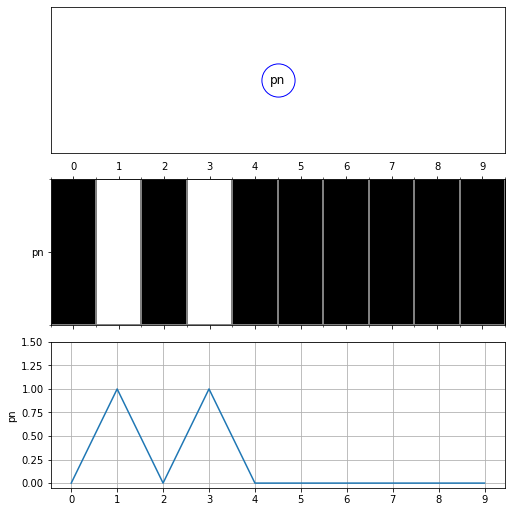

In [2]:
from simsnn.core.networks import Network
from simsnn.core.simulators import Simulator

# Create the network and the simulator object
net = Network()
sim = Simulator(net)

# Create a programmed neuron, that spikes on times 1 and 3,
# does not repeat it's programming and has the ID "pn".
programmed_neuron = net.createInputTrain(train=[0,1,0,1], loop=False, ID="pn")

# Add all neurons to the raster
sim.raster.addTarget(programmed_neuron)
# Add all neurons to the multimeter
sim.multimeter.addTarget(programmed_neuron)

# Run the simulation for 10 rounds, enable the plotting of the raster,
# the multimeter and the network structure.
sim.run(steps=10, plotting=True)

Do you understand what is going on? 

Note how neural networks with only a single neuron in them cannot be drawn.

### Connecting two neurons with a synapse.

Rasterdata:
[[False  True False  True False False False False False False]
 [False False  True False  True False False False False False]]

Multimeterdata:
[[0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


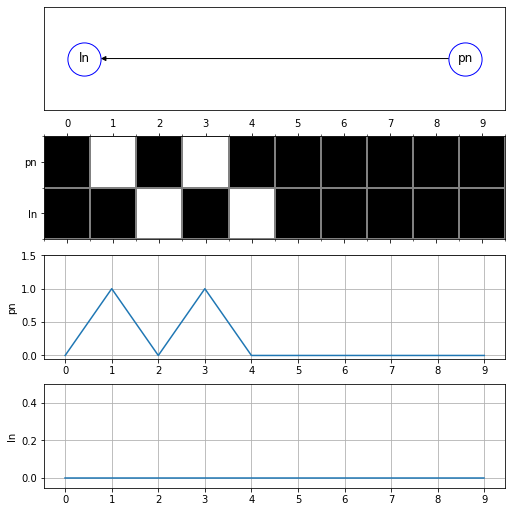

In [3]:
from simsnn.core.networks import Network
from simsnn.core.simulators import Simulator

net = Network()
sim = Simulator(net)

programmed_neuron = net.createInputTrain(train=[0,1,0,1], loop=False, ID="pn")

# Create a LIF neuron, with a membrane voltage threshold of 1,
# a post spike reset value of 0 and no voltage decay (m=1).
lif_neuron = net.createLIF(ID="ln", thr=1, V_reset=0, m=1)

# Create a Synapse, between the programmed neuron and the LIF neuron,
# with a voltage weight of 1 and a delay of 1.
net.createSynapse(pre=programmed_neuron, post=lif_neuron, ID="pn-ln", w=1, d=1)

sim.raster.addTarget([programmed_neuron, lif_neuron])
sim.multimeter.addTarget([programmed_neuron, lif_neuron])

sim.run(steps=10, plotting=True)

Note how the LIF neuron does not ever seem to get any voltage. This is just an artifact of the timing of the voltage measurement. The voltages are measured at the end of every discrete timestep. When a LIF neuron spikes, its voltage will be reset to the V_reset value, which is 0 in this case.

### Creating an endlessly spiking neuron

Rasterdata:
[[False False False  True False False False  True False False]]

Multimeterdata:
[[1. 2. 3. 0. 1. 2. 3. 0. 1. 2.]]


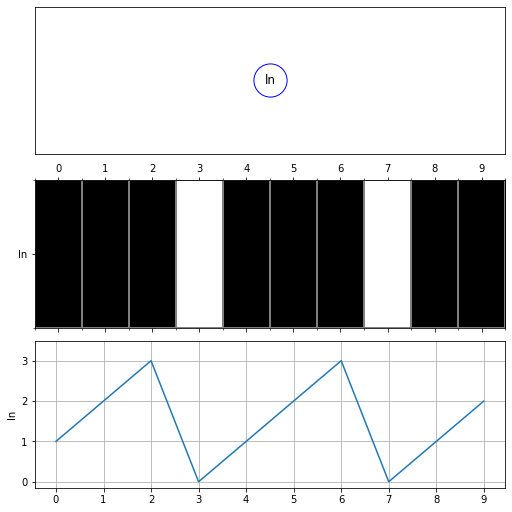

In [4]:
from simsnn.core.networks import Network
from simsnn.core.simulators import Simulator

net = Network()
sim = Simulator(net)

# Create a neuron that has threshold of 4, a post spike reset value of 0, 
# no voltage decay and a constant input current of 1
lif_neuron = net.createLIF(ID="ln", thr=4, V_reset=0, m=1, I_e=1)

sim.raster.addTarget([lif_neuron])
sim.multimeter.addTarget([lif_neuron])

sim.run(steps=10, plotting=True)